In [1]:
# Objectives: 
#        1) Use citipy to extract city names from lon and lat values
#        2) For each of the cities extract weather conditions using api
#        3) Plot scatter plots for lat values vs weather data
#        4) Perform regression analysis for lat values vs weather data      

In [2]:
# unhashtag this and run if you haven't already installed citipy
# pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Import dependencieslibraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# import API key for openweathermaps
from api_keys import weather_api_key

In [6]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Make empty lists, one for latitude and longitude coordinates, 
# and one empty list for city names
lat_lngs = []
cities = []

# Declare the range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Select 1500 values at random from our possible lat and lng ranges
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate those pulled lat and lng values to cities' names
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Make an if statement to keep each new city name only 
    # if city name is unique
    if city not in cities:
        cities.append(city)

# Print the count and city names of the unique cities we end up with
print(len(cities))
print(cities)

596
['port lincoln', 'wailua homesteads', 'dudinka', 'adamstown', 'utrik', 'vilyuysk', 'allen', 'undurkhaan', 'ayaguz', 'port alfred', 'bilibino', 'blackmans bay', 'grytviken', 'thompson', 'geraldton', 'jinka', 'orchard homes', 'ahau', 'isafjordur', 'puerto natales', 'at-bashi', 'port-aux-francais', "st. john's", 'waitangi', 'bubaque', 'zvishavane', 'nuuk', 'kingaroy', 'ilulissat', 'invercargill', 'zangguy', 'iskateley', 'badger', 'kirakira', 'chiili', 'portland', 'ankazoabo', 'taiohae', 'yigo village', 'astrakhan', 'ribeira grande', 'smithers', 'papatowai', 'haiku-pauwela', 'orotina', 'tolanaro', 'la passe', 'zemio', 'pacific grove', 'klyuchi', 'darwin', 'kulia village', 'camapua', 'salekhard', 'pasni', 'praia da vitoria', 'vorkuta', 'kaohsiung', 'saint-pierre', 'okha', 'tenenkou', 'kavaratti', 'anadyr', 'naze', 'richards bay', 'bredasdorp', 'ocean shores', 'yanam', 'kerikeri', 'sitka', 'gaspe', 'luocheng', 'vorgashor', 'viedma', 'luba', 'el granada', 'puerto ayora', 'mazouna', 'avaru

In [24]:
# Compile weather data using OpenWeatherMap api

# Base URL for the OpenWeatherMap API + API key
query_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Make an empty list for each city's corresponding weather data
city_data = []

# Set counters
record_count = 1
set_count = 1

# Use a For Loop to cycle through all of our cities
for city in cities:

    # Build a URL to send request
    city_url = query_url + "&q=" + city

    # For each of the cities use a try/except function to keep the code from crashing as it loops
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to the city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
              
print("Done!")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Done!


In [27]:
# Convert the city_data into a useable dataframe
city_data_df = pd.DataFrame(city_data)

In [28]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port lincoln,-34.7333,135.8667,15.37,67,100,3.67,AU,1698416478
1,wailua homesteads,22.0669,-159.3780,21.24,78,0,3.09,US,1698416478
2,dudinka,69.4058,86.1778,-12.96,99,69,1.34,RU,1698416478
3,adamstown,-25.0660,-130.1015,22.16,81,100,2.40,PN,1698416479
4,utrik,11.2278,169.8474,27.89,78,64,3.86,MH,1698416479


In [29]:
# Export to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [30]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,15.37,67,100,3.67,AU,1698416478
1,wailua homesteads,22.0669,-159.3780,21.24,78,0,3.09,US,1698416478
2,dudinka,69.4058,86.1778,-12.96,99,69,1.34,RU,1698416478
3,adamstown,-25.0660,-130.1015,22.16,81,100,2.40,PN,1698416479
4,utrik,11.2278,169.8474,27.89,78,64,3.86,MH,1698416479


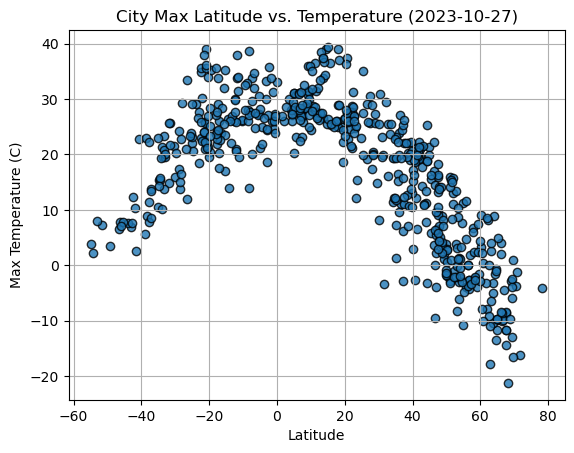

In [31]:
# Associate Latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save 
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

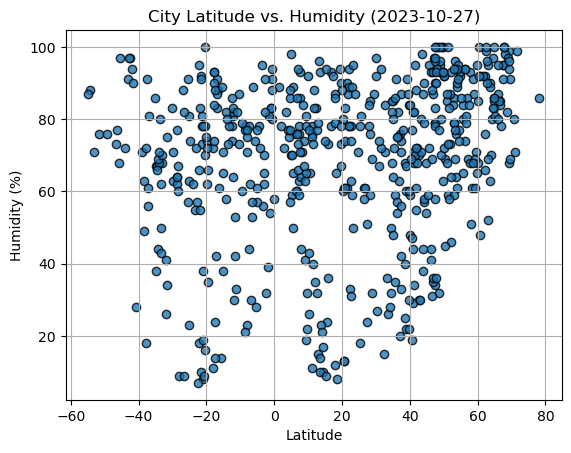

In [32]:
# Associate Latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

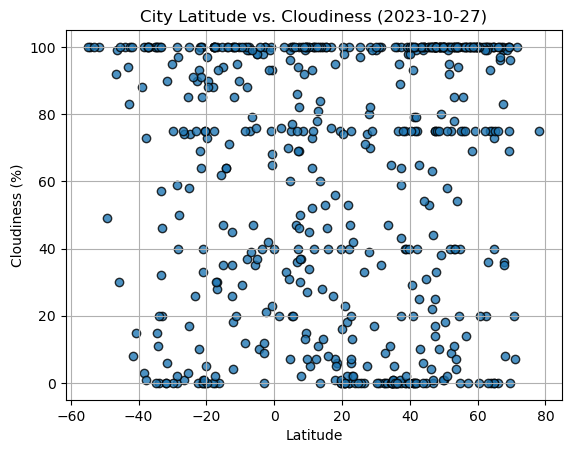

In [33]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

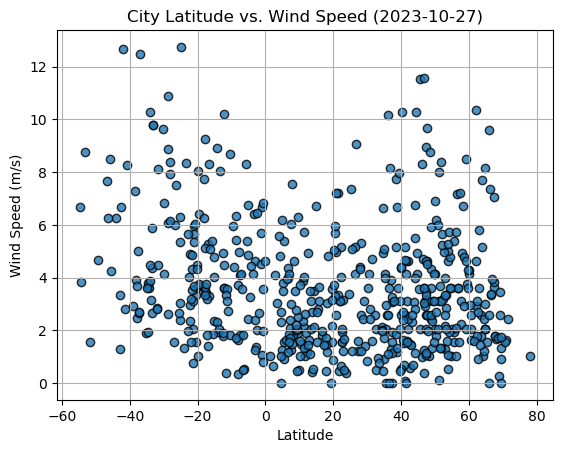

In [34]:
# Associate Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

In [38]:
# Regression analysis for each of the pairs above.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    plt.show()

In [39]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,21.24,78,0,3.09,US,1698416478
2,dudinka,69.4058,86.1778,-12.96,99,69,1.34,RU,1698416478
4,utrik,11.2278,169.8474,27.89,78,64,3.86,MH,1698416479
5,vilyuysk,63.7553,121.6247,-5.00,90,100,1.79,RU,1698416479
6,allen,41.0706,-85.0144,21.21,82,20,5.14,US,1698416479


In [40]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,15.37,67,100,3.67,AU,1698416478
3,adamstown,-25.0660,-130.1015,22.16,81,100,2.40,PN,1698416479
8,port alfred,-33.5906,26.8910,19.54,80,100,3.13,ZA,1698416479
10,blackmans bay,-43.0167,147.3167,6.96,91,94,3.35,AU,1698416480
11,grytviken,-54.2811,-36.5092,2.25,88,100,3.83,GS,1698416480


The r-squared value is: 0.7658860690180392
The r value is: -0.8751491695808431


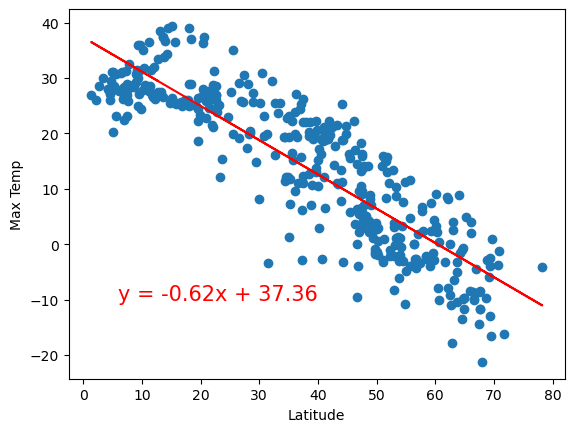

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-squared value is: 0.4979544073714211
The r value is: 0.7056588463070672


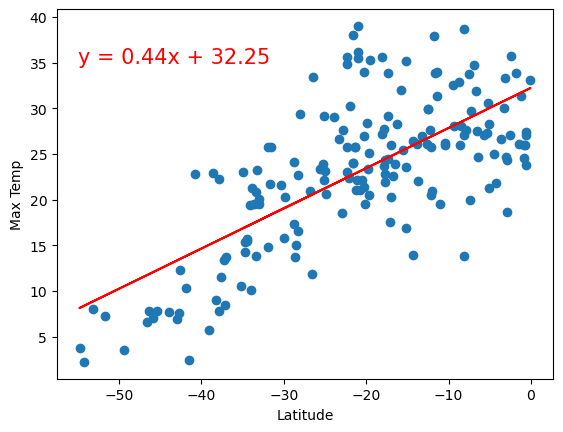

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

The r-squared value is: 0.09079720318002374
The r value is: 0.3013257426441089


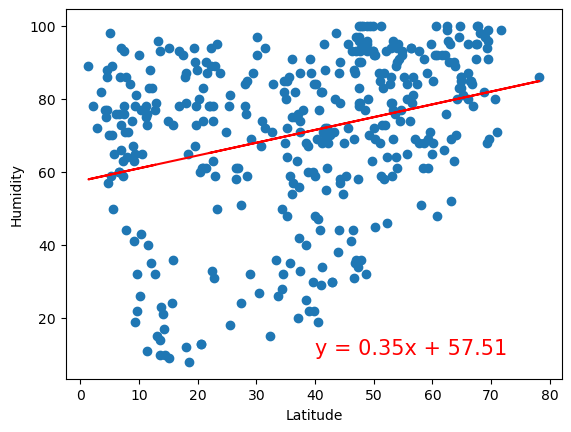

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-squared value is: 0.0014039337339811473
The r value is: -0.03746910372535147


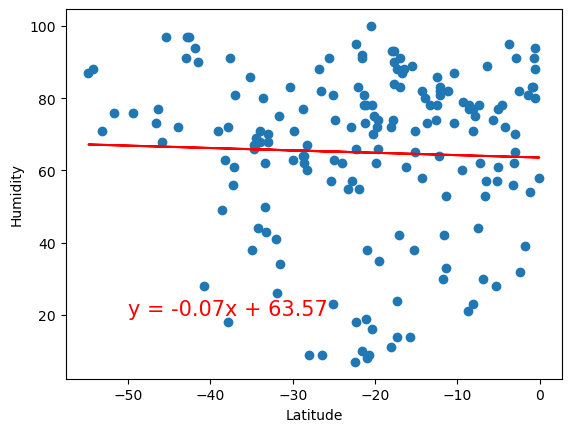

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

The r-squared value is: 0.030117642302293163
The r value is: 0.1735443525508484


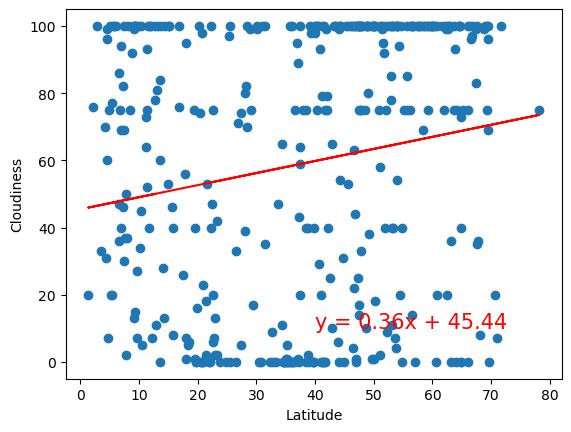

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-squared value is: 0.0005316397730645836
The r value is: -0.023057314957830272


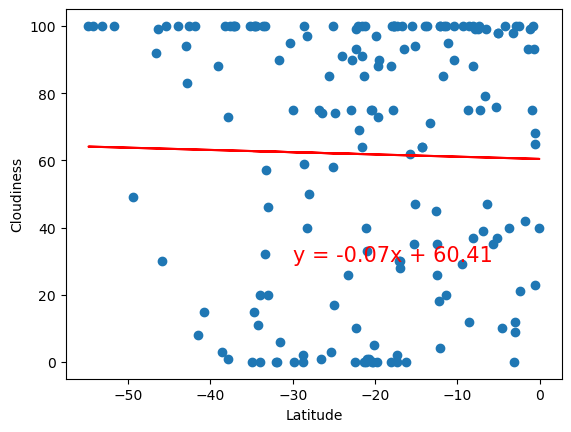

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

The r-squared value is: 0.012948778126259794
The r value is: 0.11379269803576939


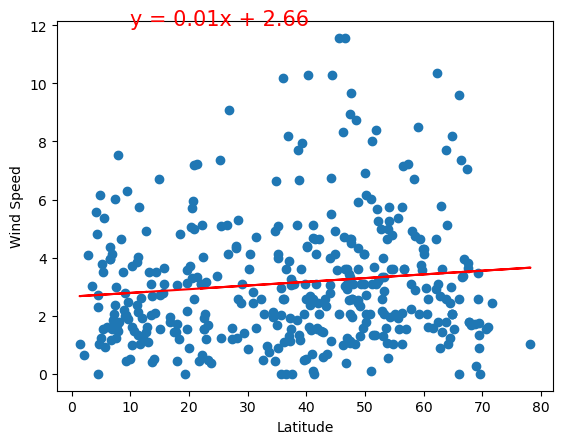

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-squared value is: 0.05803775062468704
The r value is: -0.24091025429542645


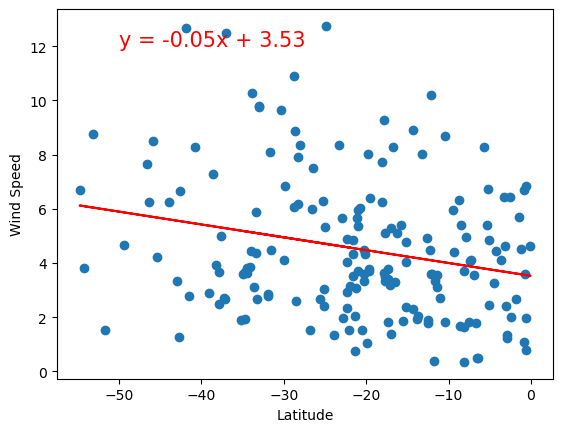

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))